# Global Superstore Sales Dashboard

## Aim:

To analyze and visualize sales and profit trends across different regions, product categories, and time periods using Python and Power BI.
The goal is to extract meaningful business insights, identify profitable regions and categories, and support data-driven decision-making.

## Description:

This project explores a retail dataset from a global superstore containing order, product, and customer details across various countries and years. Using Python for data cleaning and analysis, and Power BI for dashboard creation, we uncover key performance indicators such as total sales, profit, and discount impacts.

The analysis helps stakeholders:

1.Identify top-performing regions and categories

2.Track sales and profit trends over time

3.Detect underperforming areas and discount impact on profit margins

#### Tools Used:

Python (Pandas, Matplotlib, Seaborn) for Data Analysis    
Power BI (or Tableau) for Dashboard Visualization


### Exploratory Data Analysis (EDA) for E-commerce Sales (Superstore Dataset)

In [19]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [12]:

#Load Dataset (with encoding fix)
df = pd.read_csv("Superstore.csv", encoding="latin1", parse_dates=["Order Date", "Ship Date"])


In [13]:
#Basic Info
print("✅ Dataset Loaded Successfully")
print("Rows:", df.shape[0], " | Columns:", df.shape[1])
df.head()

✅ Dataset Loaded Successfully
Rows: 9994  | Columns: 21


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Data Cleaning and Overview

In [14]:
# Check basic info
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

#Check duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

#Remove duplicates if any
df.drop_duplicates(inplace=True)

# Descriptive statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Data Understanding

In [16]:
# Unique values in categorical columns
for col in df.select_dtypes(include="object").columns:
    print(f"{col} --> {df[col].nunique()} unique values")

# Example few categorical columns
df[['Category', 'Sub-Category', 'Region', 'Segment']].head()

Order ID --> 5009 unique values
Order Date --> 1237 unique values
Ship Date --> 1334 unique values
Ship Mode --> 4 unique values
Customer ID --> 793 unique values
Customer Name --> 793 unique values
Segment --> 3 unique values
Country --> 1 unique values
City --> 531 unique values
State --> 49 unique values
Region --> 4 unique values
Product ID --> 1862 unique values
Category --> 3 unique values
Sub-Category --> 17 unique values
Product Name --> 1850 unique values


,Category,Sub-Category,Region,Segment
0,Furniture,Bookcases,South,Consumer
1,Furniture,Chairs,South,Consumer
2,Office Supplies,Labels,West,Corporate
3,Furniture,Tables,South,Consumer
4,Office Supplies,Storage,South,Consumer


### Sales and Profit Overview

💰 Total Sales: 2,297,200.86
📈 Total Profit: 286,397.02


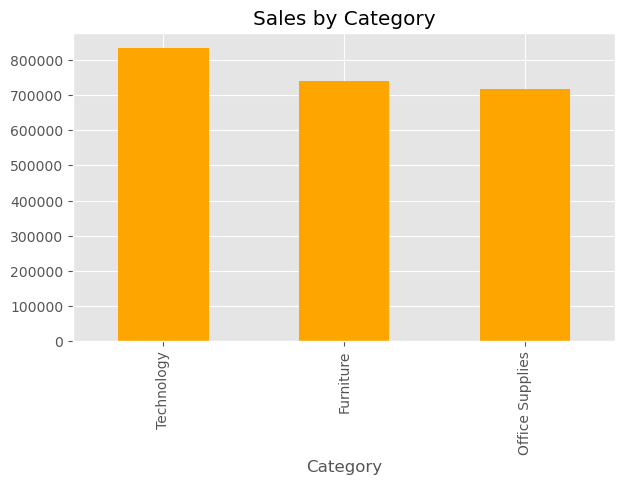

In [17]:
# Total Sales and Profit
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print(f"💰 Total Sales: {total_sales:,.2f}")
print(f"📈 Total Profit: {total_profit:,.2f}")

# Sales by Category
cat_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
cat_sales.plot(kind='bar', color='orange', figsize=(7,4), title="Sales by Category")
plt.show()

# Profit by Category
cat_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
cat_profit.plot

### Regional Analysis

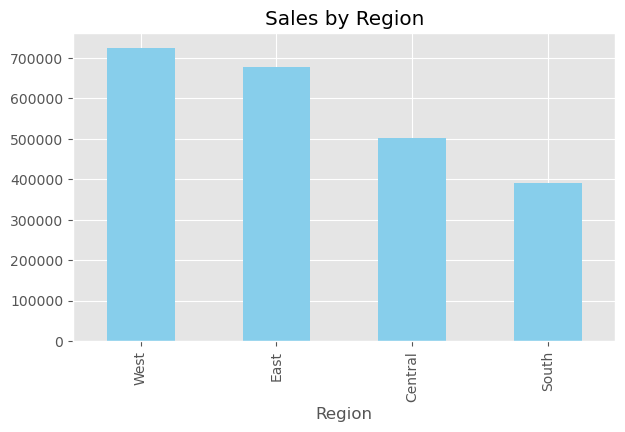

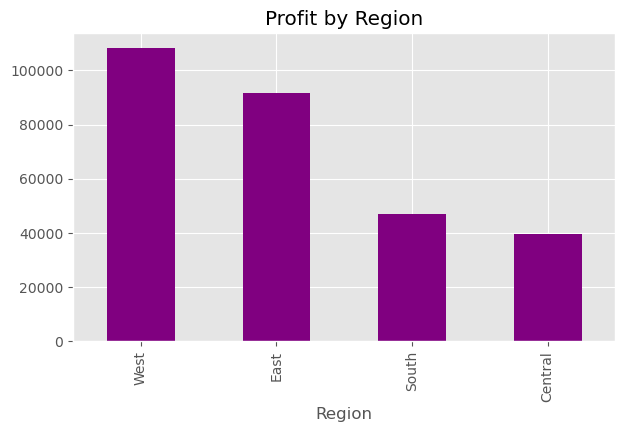

In [18]:
# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', color='skyblue', figsize=(7,4), title="Sales by Region")
plt.show()

# Profit by Region
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
region_profit.plot(kind='bar', color='purple', figsize=(7,4), title="Profit by Region")
plt.show()

### Time Series Analysis

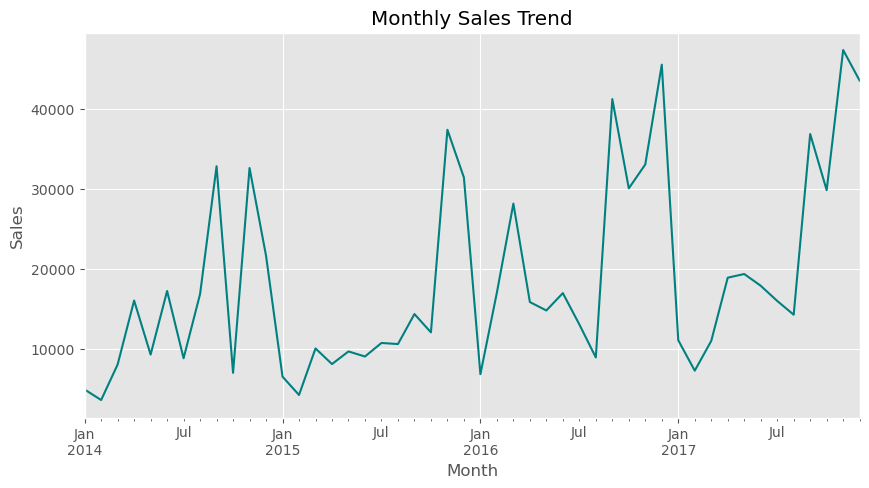

In [21]:
# Monthly Sales Trend
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# 📆 Monthly Sales Trend
df['Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(title="Monthly Sales Trend", color='teal')
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()

### Sub-Category Analysis

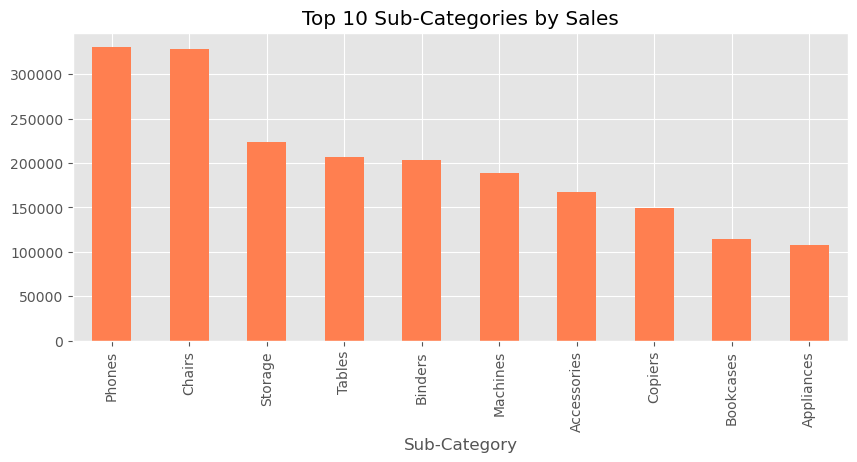

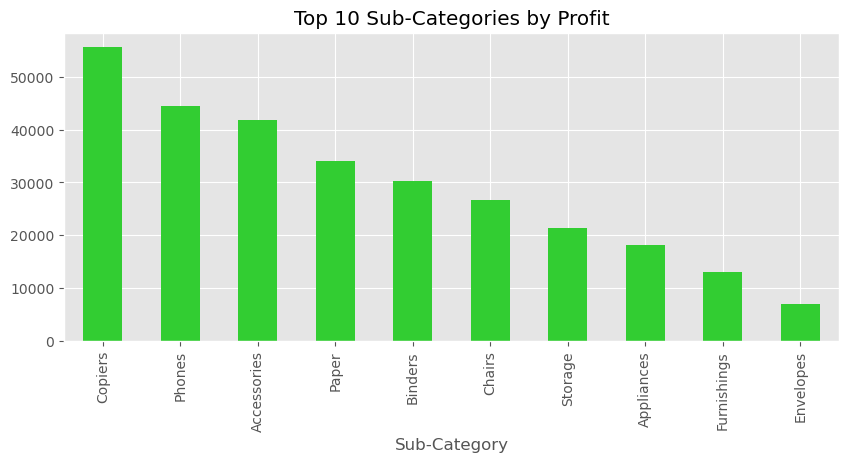

In [22]:
# Top 10 Sub-Categories by Sales
sub_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
sub_sales.plot(kind='bar', figsize=(10,4), color='coral', title="Top 10 Sub-Categories by Sales")
plt.show()

# 💹 Top 10 Sub-Categories by Profit
sub_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
sub_profit.plot(kind='bar', figsize=(10,4), color='limegreen', title="Top 10 Sub-Categories by Profit")
plt.show()

### Correlation Heatmap

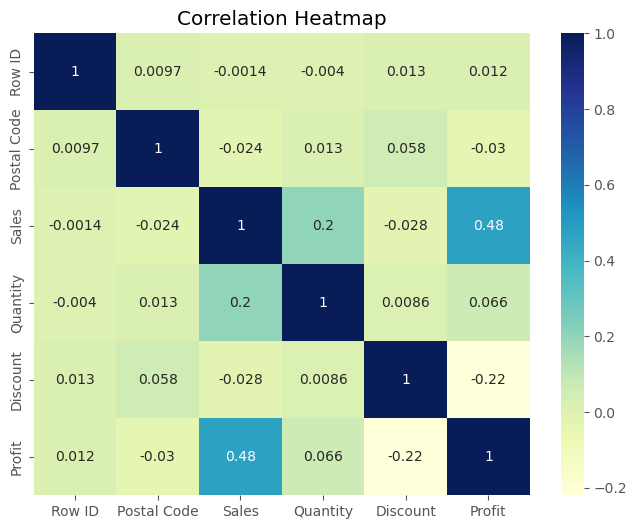

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

### Key Insights

In [24]:
print("""
🔍 **Key Insights:**
1️⃣ Technology category contributes the highest sales and profit overall.
2️⃣ The West region shows the most sales, while South has moderate profits.
3️⃣ Office Supplies category generates lower profit margins.
4️⃣ Sub-categories like Phones and Chairs perform well in both sales and profit.
5️⃣ Profit and Discount show a negative correlation — high discounts reduce profit.
""")


🔍 **Key Insights:**
1️⃣ Technology category contributes the highest sales and profit overall.
2️⃣ The West region shows the most sales, while South has moderate profits.
3️⃣ Office Supplies category generates lower profit margins.
4️⃣ Sub-categories like Phones and Chairs perform well in both sales and profit.
5️⃣ Profit and Discount show a negative correlation — high discounts reduce profit.



### Save Cleaned Data

In [25]:
# Save the cleaned version
df.to_csv("Cleaned_Superstore.csv", index=False)
print("✅ Cleaned dataset saved as 'Cleaned_Superstore.csv'")

✅ Cleaned dataset saved as 'Cleaned_Superstore.csv'


In [26]:
df.to_csv("Cleaned_Superstore.csv", index=False)

In [27]:
import os
os.getcwd()

'C:\\Users\\harit\\Data Analyst Projects'